In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle


plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [2]:
# load dataframe from csv
dfFeatures = pd.read_csv("music_features_updated.csv")

# shuffle dataframe
dfFeatures = shuffle(dfFeatures)

# extract genres for labels
genreList = dfFeatures['genre']

# drop genres and filenames for training data
dfFeatures= dfFeatures.drop(columns = ['filename', 'genre'])

dfFeatures.head()

,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
98,0.256559,0.097805,1451.078530,4.455148e+05,2115.033789,191468.623305,3387.957240,4.020225e+06,0.043057,0.001301,...,-5.807066,59.898315,-16.018026,63.045177,-15.020533,48.410671,-13.760617,50.009289,-15.609768,50.457809
447,0.494313,0.085065,2617.255280,7.845417e+05,2399.572513,119441.604830,5123.703279,1.787439e+06,0.127907,0.007395,...,-2.978401,44.221405,-5.610396,31.106529,-3.190335,22.653074,-3.242731,36.222336,-4.532583,38.051365
960,0.390121,0.082878,1850.428852,2.463312e+05,1892.937775,82576.607544,3771.233267,8.630444e+05,0.094739,0.001485,...,-0.178071,32.573273,-11.048622,43.452011,3.768485,61.084740,-10.938493,59.957050,-1.524093,30.500521
736,0.471825,0.104055,3390.898021,1.855555e+06,3192.514222,251663.107583,7150.122580,4.727747e+06,0.114665,0.009212,...,-5.258199,78.744232,1.939290,36.544201,0.582044,54.575752,-0.837316,74.757607,-1.105614,137.820282
961,0.371361,0.080315,2283.289733,2.021661e+05,2217.076713,68235.585417,4724.389762,1.122875e+06,0.120816,0.001332,...,5.131686,34.649742,-14.018639,21.248363,0.218099,63.952934,-2.193121,64.481880,-0.939168,54.283737


In [3]:
# standardize data  
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dfFeatures.iloc[:, :-1], dtype = float))

# encode labels 
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [4]:
# initialize keras network
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
# configure model for training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# train model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 2.2369 - accuracy: 0.1919
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8232 - accuracy: 0.3745
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5286 - accuracy: 0.4671
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2574 - accuracy: 0.6098
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0963 - accuracy: 0.6259
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0231 - accuracy: 0.6535
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8445 - accuracy: 0.7176
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.7423
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.7761
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7878
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9991
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9988
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9983
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9956
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9974
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9966
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9993
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 93/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9974
Epoch 94/100
7/7 [===============

loss
accuracy


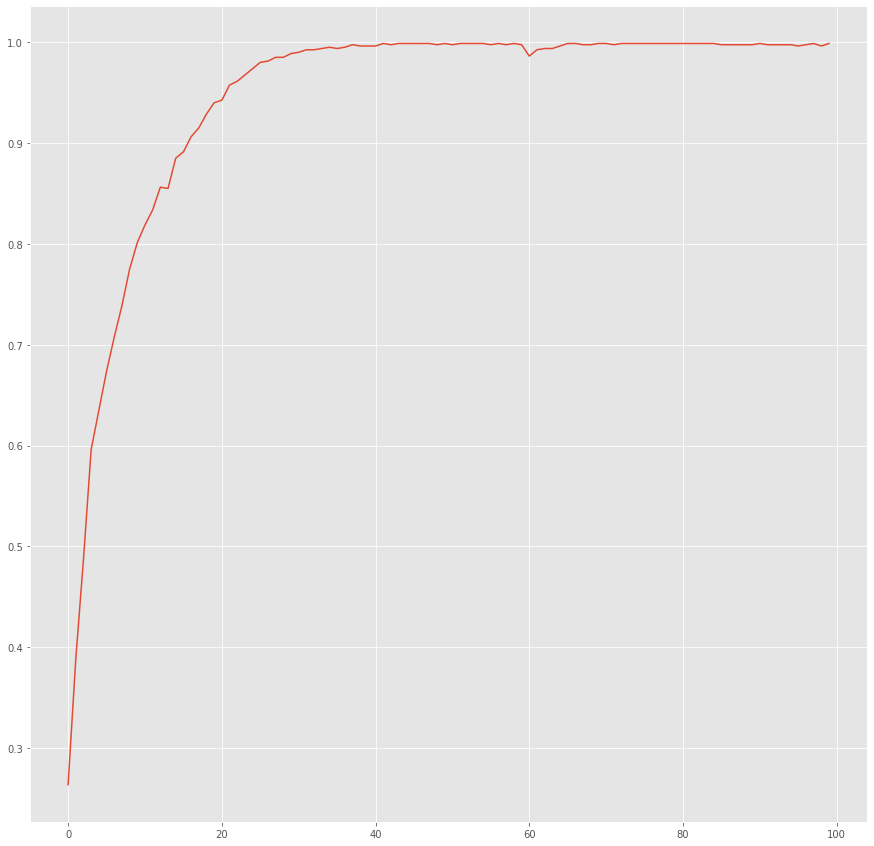

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

ax.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
for i in history.history:
    print(i)

In [8]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 3ms/step - loss: 1.8778 - accuracy: 0.6750


In [9]:
# initialize keras network
modeldropout = keras.Sequential()
modeldropout.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(128, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(64, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
modeldropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = modeldropout.fit(X_train,
                    y_train,
                    epochs=250,
                    batch_size=128)

Epoch 1/250
7/7 [==============================] - 0s 3ms/step - loss: 2.3095 - accuracy: 0.1386
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 2.0403 - accuracy: 0.2982
Epoch 3/250
7/7 [==============================] - 0s 3ms/step - loss: 1.8097 - accuracy: 0.3685
Epoch 4/250
7/7 [==============================] - 0s 3ms/step - loss: 1.6345 - accuracy: 0.4438
Epoch 5/250
7/7 [==============================] - 0s 3ms/step - loss: 1.5204 - accuracy: 0.4684
Epoch 6/250
7/7 [==============================] - 0s 3ms/step - loss: 1.4158 - accuracy: 0.4842
Epoch 7/250
7/7 [==============================] - 0s 4ms/step - loss: 1.3668 - accuracy: 0.4928
Epoch 8/250
7/7 [==============================] - 0s 4ms/step - loss: 1.2793 - accuracy: 0.5527
Epoch 9/250
7/7 [==============================] - 0s 4ms/step - loss: 1.2059 - accuracy: 0.5718
Epoch 10/250
7/7 [==============================] - 0s 3ms/step - loss: 1.1884 - accuracy: 0.5826
Epoch 11/250
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9638
Epoch 85/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9667
Epoch 86/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9536
Epoch 87/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9657
Epoch 88/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9579
Epoch 89/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9522
Epoch 90/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9614
Epoch 91/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9687
Epoch 92/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9603
Epoch 93/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.9617
Epoch 94/250
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9930
Epoch 167/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9928
Epoch 168/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9850
Epoch 169/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9865
Epoch 170/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9894
Epoch 171/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9851
Epoch 172/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 173/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9894
Epoch 174/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9967
Epoch 175/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9964
Epoch 176/250
7/7 [=====

7/7 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9913
Epoch 249/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9887
Epoch 250/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9922


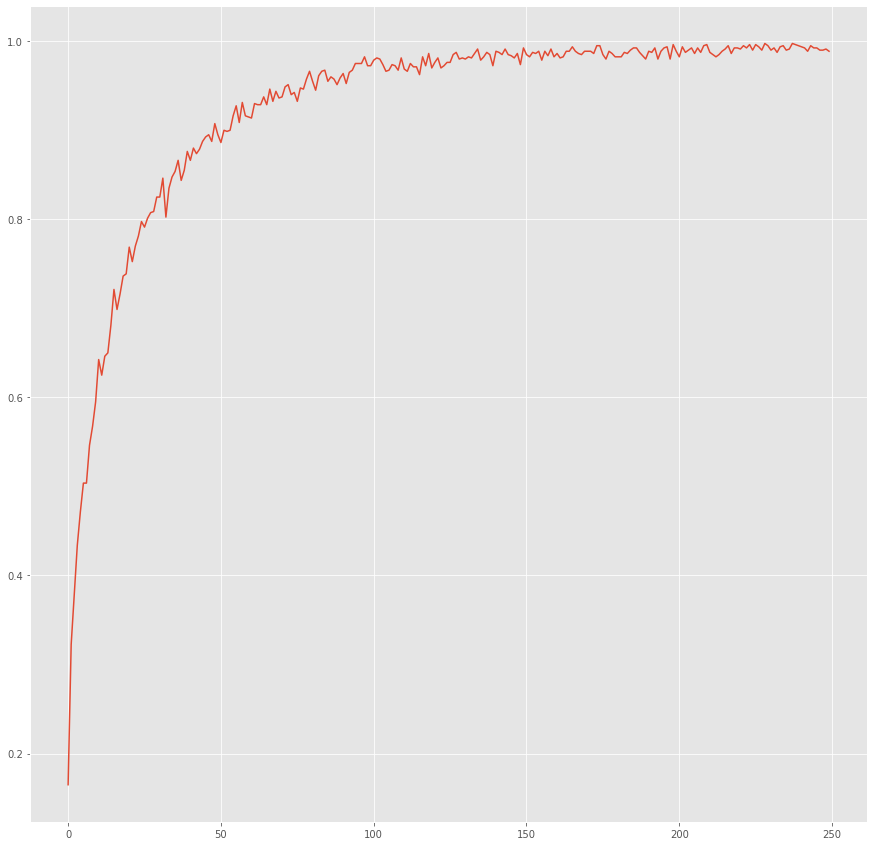

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

ax.plot(history.history['accuracy'])

In [13]:
test_loss, test_acc  = modeldropout.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 1.7751 - accuracy: 0.7100
